# Project: Step 1

FOURREAU Mathis

GAUSSIN Natacha

GIRONA Margaux

ESILV IF3

## Library importation

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [10]:
X = pd.read_csv("X_train_NHkHMNU.csv")
y = pd.read_csv("y_train_ZAN5mwg.csv")

# Merge both datasets
df = pd.concat([X, y], axis=1)

# Drop the second-to-last column if needed
df = df.drop(df.columns[-2], axis=1)

## 1) Descriptive analysis

In [4]:
df.head()

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,-0.692860,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,-0.990324,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733


In [5]:
df.shape

(1494, 35)

Our dataset contains 37 features and 1494 observations.

### Name of the different features

In [6]:
df.columns

Index(['DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET'],
      dtype='object')

### Type of the different features

In [7]:
df.dtypes

DAY_ID                int64
COUNTRY              object
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
TARGET              float64
dtype: object

### Missing values

In [8]:
df.isna().sum()

DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
TARGET                0
dtype: int64

The dataset contains several missing values across different features. In particular, DE_NET_EXPORT and DE_NET_IMPORT have 124 missing values. Other features like the Weather features have non negligeable quantity of missing values. We will have to make a choice for them in the next steps

In [9]:
print(f"Percentage of missing values for the DE_NET_EXPORT feature: {df['DE_NET_EXPORT'].isna().sum() / df.shape[0] * 100:.2f}%")

Percentage of missing values for the DE_NET_EXPORT feature: 8.30%


### Duplicate Values Detection

In [10]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


### Descriptive statistics of our features

In [11]:
df.describe(include=["number"])

,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
count,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,1494.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,0.780699,...,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510,0.089934
std,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,0.850190,...,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624,1.034582
min,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,-1.117260,...,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790,-6.519268
25%,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,0.134947,...,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968,-0.219861
50%,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,0.740006,...,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056,0.000000
75%,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,1.399461,...,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094,0.269719
max,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,3.118082,...,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818,7.786578


The only non-numeric feature is "COUNTRY" and it's repartition is:

In [12]:
print(df["COUNTRY"].value_counts(normalize=True) * 100)

COUNTRY
FR    56.961178
DE    43.038822
Name: proportion, dtype: float64


### Correlations between our features

In [13]:
corr_matrix = df.drop(columns="COUNTRY").corr()
print(corr_matrix)

                    DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
DAY_ID            1.000000       -0.019309        0.011148        0.022606   
DE_CONSUMPTION   -0.019309        1.000000        0.813202        0.423988   
FR_CONSUMPTION    0.011148        0.813202        1.000000        0.496264   
DE_FR_EXCHANGE    0.022606        0.423988        0.496264        1.000000   
FR_DE_EXCHANGE   -0.022606       -0.423988       -0.496264       -1.000000   
DE_NET_EXPORT     0.038967        0.541806        0.545595        0.703962   
FR_NET_EXPORT     0.009467       -0.131230       -0.229635       -0.677812   
DE_NET_IMPORT    -0.038967       -0.541806       -0.545595       -0.703962   
FR_NET_IMPORT    -0.009467        0.131230        0.229635        0.677812   
DE_GAS           -0.051674        0.233345        0.378877        0.030742   
FR_GAS           -0.019301        0.632066        0.779727        0.470966   
DE_COAL          -0.001295        0.455872        0.478193      

In [14]:
np.fill_diagonal(corr_matrix.values, np.nan)

# "Unstack" pour transformer la matrice en série, puis trier par valeur absolue
top_corr = corr_matrix.unstack().dropna().sort_values(key=abs, ascending=False)

# Garder les 5 premières
print(top_corr.head(10))

DE_FR_EXCHANGE    FR_DE_EXCHANGE     -1.000000
DE_NET_IMPORT     DE_NET_EXPORT      -1.000000
FR_DE_EXCHANGE    DE_FR_EXCHANGE     -1.000000
FR_NET_EXPORT     FR_NET_IMPORT      -1.000000
FR_NET_IMPORT     FR_NET_EXPORT      -1.000000
DE_NET_EXPORT     DE_NET_IMPORT      -1.000000
FR_RESIDUAL_LOAD  FR_CONSUMPTION      0.965086
FR_CONSUMPTION    FR_RESIDUAL_LOAD    0.965086
FR_WIND           DE_WIND             0.820724
DE_WIND           FR_WIND             0.820724
dtype: float64


We observe that some features are just the opposite of other like DE_FR_EXCHANGE FR_DE_EXCHANGE for exemple, that would be interesting to drop them later.

In [15]:
target_corr = corr_matrix["TARGET"].drop("TARGET").sort_values(key=abs, ascending=False)

# Afficher les 10 plus fortes corrélations
print(target_corr.head(10))

DE_NET_EXPORT      -0.154301
DE_NET_IMPORT       0.154301
DE_WINDPOW         -0.150287
DE_RESIDUAL_LOAD    0.132555
FR_WINDPOW         -0.132523
DE_GAS              0.096657
DE_HYDRO            0.086127
DE_WIND            -0.084127
FR_HYDRO            0.052820
DE_CONSUMPTION     -0.052565
Name: TARGET, dtype: float64


We can see that our features don't have high correlations with our target.

### Visualisations

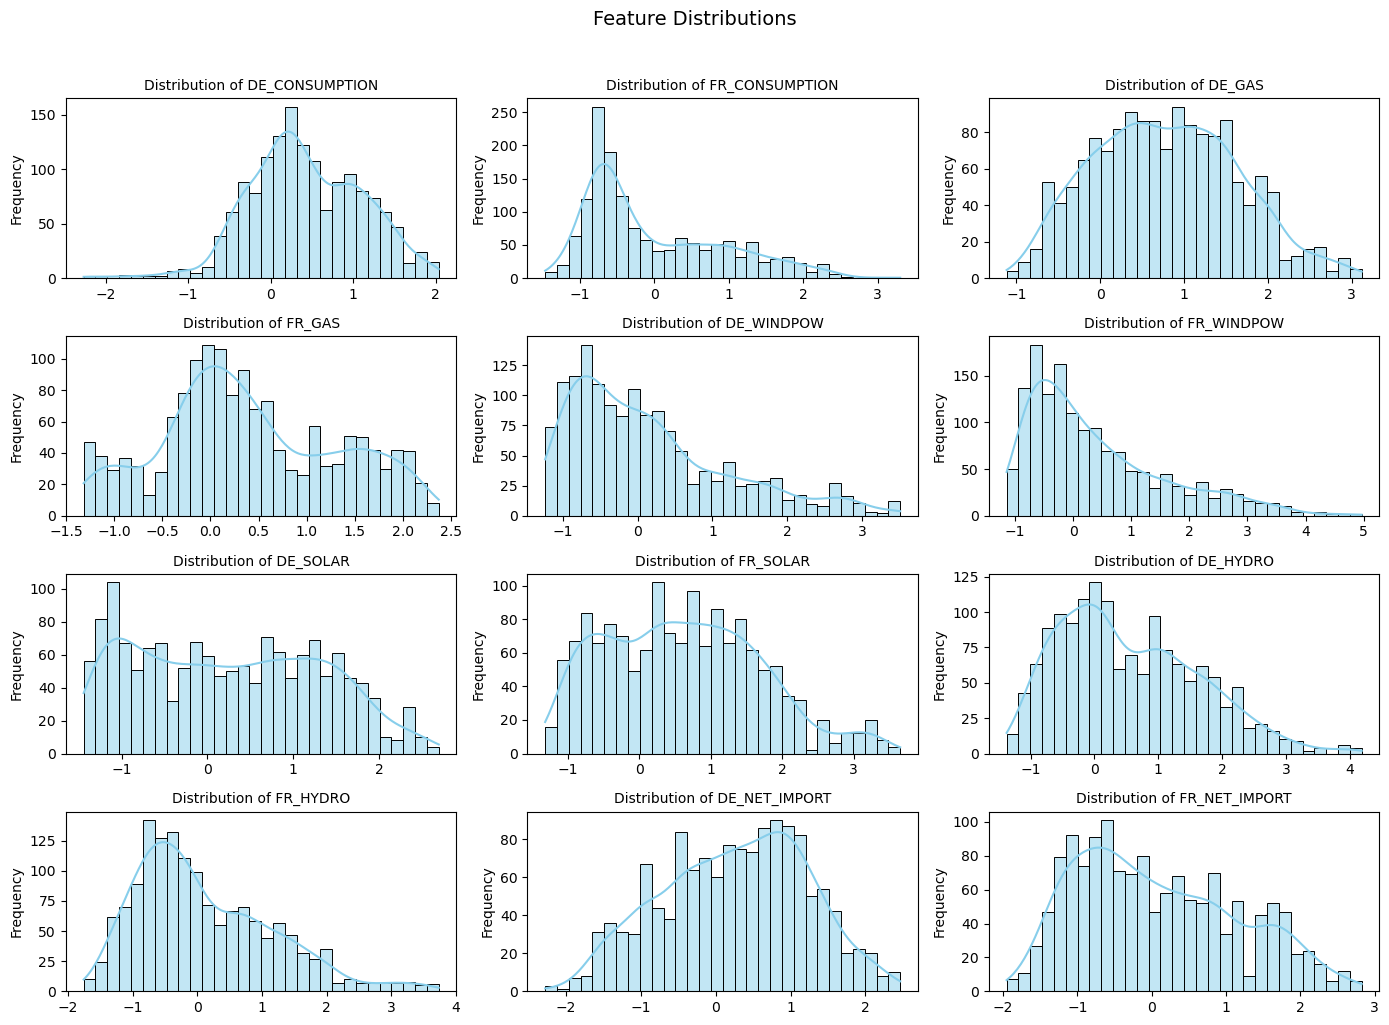

In [26]:
features = [
    "DE_CONSUMPTION", "FR_CONSUMPTION",
    "DE_GAS", "FR_GAS",
    "DE_WINDPOW", "FR_WINDPOW",
    "DE_SOLAR", "FR_SOLAR",
    "DE_HYDRO", "FR_HYDRO",
    "DE_NET_IMPORT", "FR_NET_IMPORT"
]

# Plot distributions
plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.suptitle("Feature Distributions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

The distributions of the features show heterogeneous patterns.  
- Some variables, such as **`DE_CONSUMPTION`**, **`DE_GAS`**, and **`DE_NET_IMPORT`**, are approximately symmetric close to a normal distribution.  
- Others, like **`FR_CONSUMPTION`**, **`FR_WINDPOW`**, and **`FR_HYDRO`**, are clearly right-skewed, with long tails toward higher values.
- Finally `DE_SOLAR`** and **`FR_SOLAR`are more close to uniform distribution.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


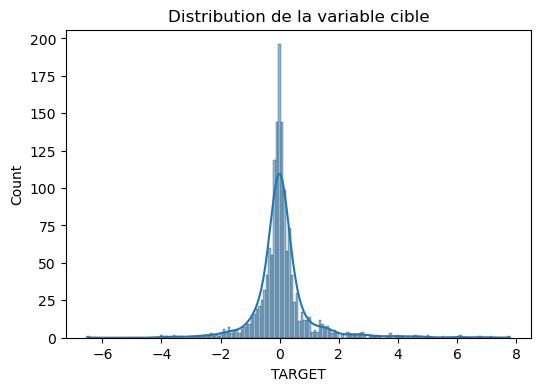

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["TARGET"], kde=True)
plt.title("Distribution de la variable cible")
plt.show()

Our features seems to be already stantardized so it's normal to have this shape of distribution.

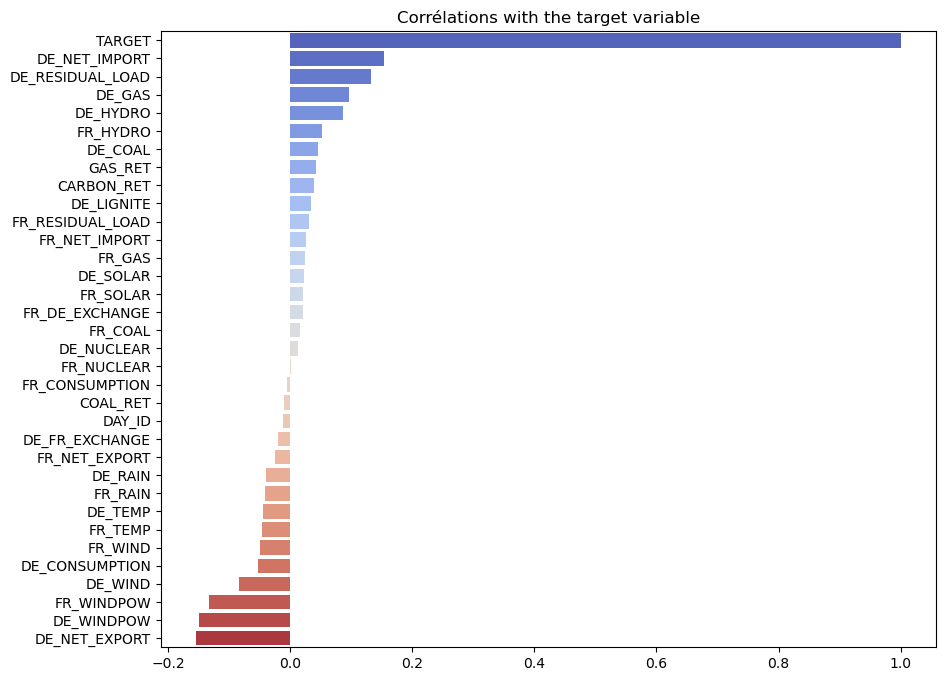

In [17]:
corr = df.select_dtypes(include=["float64", "int64"]).corr()["TARGET"].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Corrélations with the target variable")
plt.show()

The most positively correlated features with the target are **`DE_NET_IMPORT`**, **`DE_RESIDUAL_LOAD`**, and **`DE_GAS`**, indicating their potential predictive importance.  
Furthermore, several weather variables such as **`DE_WIND`**, **`FR_WINDPOW`**, and **`DE_TEMP`** show negative correlations, which may also be useful for prediction.  
Many other features have near-zero correlation, suggesting a weaker linear relationship with the target.  

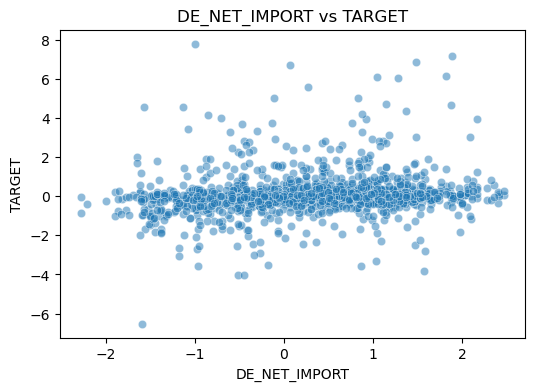

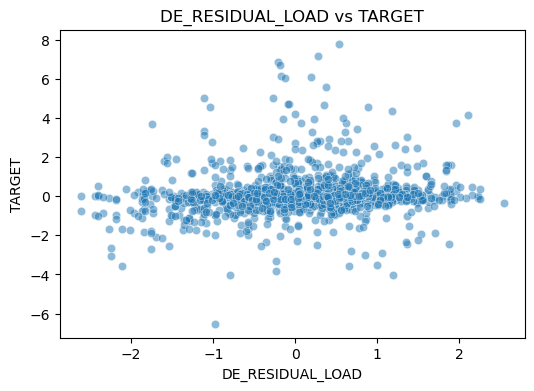

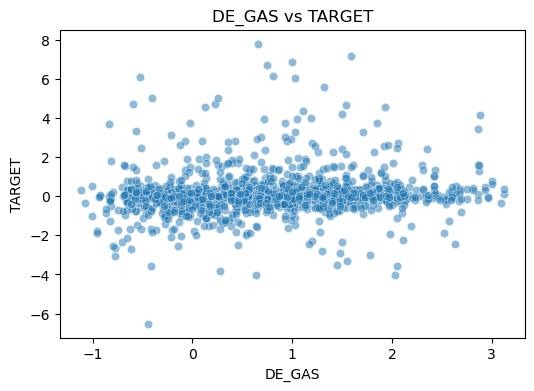

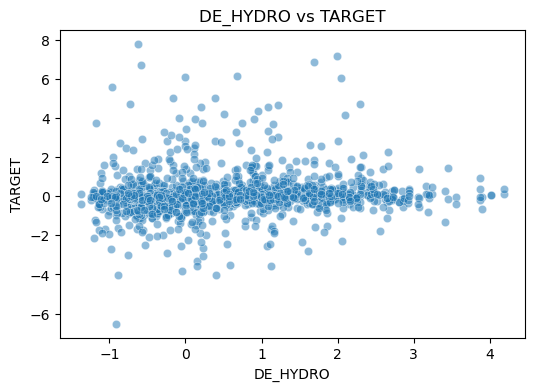

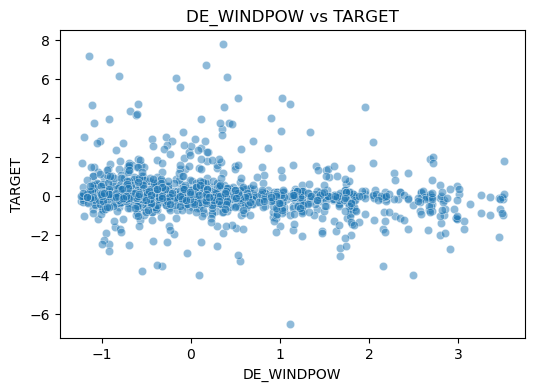

In [22]:
top_features = ["DE_NET_IMPORT", "DE_RESIDUAL_LOAD", "DE_GAS", "DE_HYDRO", "DE_WINDPOW"]

for feat in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feat], y=df["TARGET"], alpha=0.5)
    plt.title(f"{feat} vs TARGET")
    plt.show()

The scatter plots show weak but noticeable positive trends between **`DE_NET_IMPORT`**, **`DE_RESIDUAL_LOAD`**, **`DE_GAS`**, **`DE_HYDRO`** and the target variable.  
The relationships are not strongly linear, as the points remain widely scattered, but the little upward tendency suggests these features may carry predictive information.  

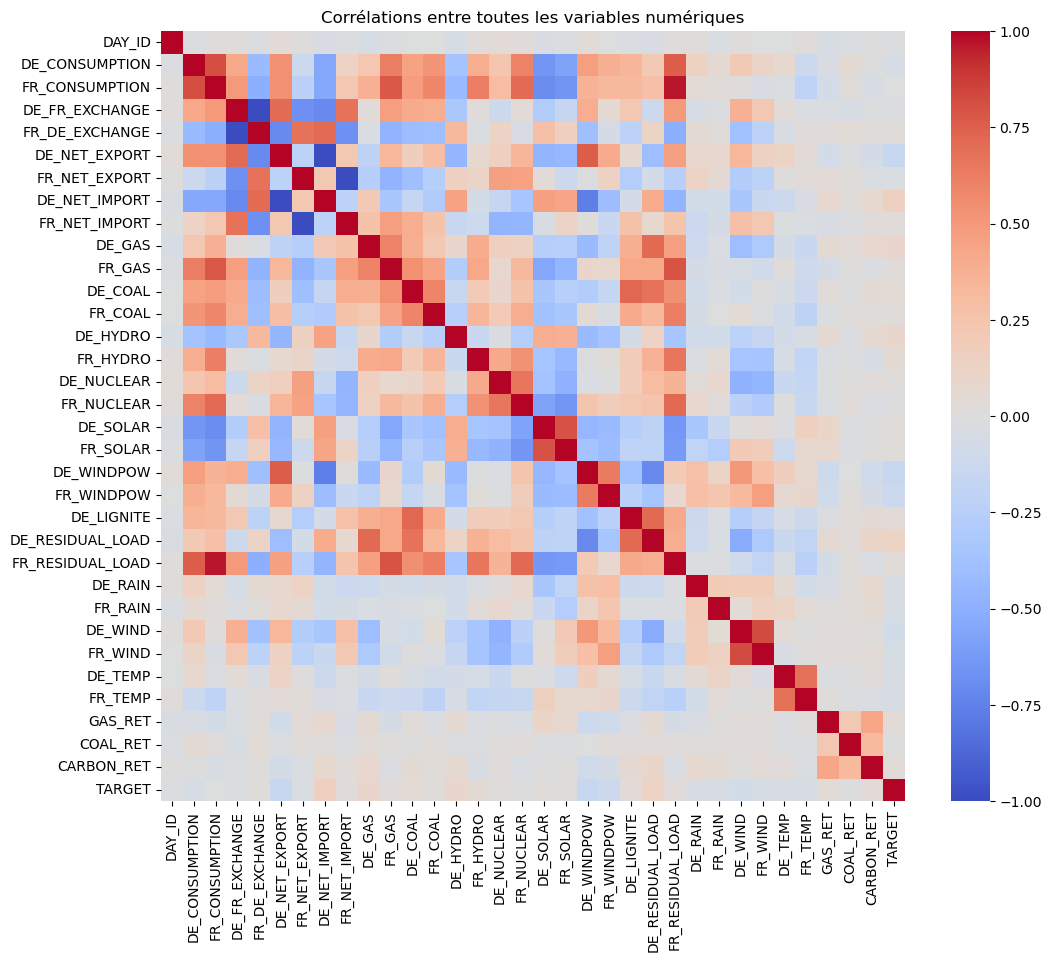

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', center=0)
plt.title("Corrélations entre toutes les variables numériques")
plt.show()

## 2)  Implementation of the necessary pre-processing.

### Missing values

We saw before that some variables that have missing values.

Let's study there proportion:

In [21]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values()

print("The proportion of missing values per column in % is :")
print(missing_values)

The proportion of missing values per column in % is :
DE_FR_EXCHANGE    1.673360
FR_DE_EXCHANGE    1.673360
FR_NET_EXPORT     4.685408
FR_NET_IMPORT     4.685408
DE_RAIN           6.291834
FR_RAIN           6.291834
DE_WIND           6.291834
FR_WIND           6.291834
DE_TEMP           6.291834
FR_TEMP           6.291834
DE_NET_EXPORT     8.299866
DE_NET_IMPORT     8.299866
dtype: float64


We can observe that the proportion of missing values per column is low (it does not exceed 8.30%) for few numerical columns. Since the proportion of missing value is low, we devide to keep all rows and replace the null values by the column's median.

Let's apply that method :


In [22]:
df = df.fillna(df.median(numeric_only=True))

In [23]:
df.isnull().sum()

DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
TARGET              0
dtype: int64

**Observations**

All missing values have been replaced with the median. Our dataset no longer contains any missing values

## Categorical Features

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_ID            1494 non-null   int64  
 1   COUNTRY           1494 non-null   object 
 2   DE_CONSUMPTION    1494 non-null   float64
 3   FR_CONSUMPTION    1494 non-null   float64
 4   DE_FR_EXCHANGE    1494 non-null   float64
 5   FR_DE_EXCHANGE    1494 non-null   float64
 6   DE_NET_EXPORT     1494 non-null   float64
 7   FR_NET_EXPORT     1494 non-null   float64
 8   DE_NET_IMPORT     1494 non-null   float64
 9   FR_NET_IMPORT     1494 non-null   float64
 10  DE_GAS            1494 non-null   float64
 11  FR_GAS            1494 non-null   float64
 12  DE_COAL           1494 non-null   float64
 13  FR_COAL           1494 non-null   float64
 14  DE_HYDRO          1494 non-null   float64
 15  FR_HYDRO          1494 non-null   float64
 16  DE_NUCLEAR        1494 non-null   float64


We can see that the variable COUNTRY is not an numerical value.

For a machine learning problem it is better to transform it into a numerical column.

In [25]:
encoder = LabelEncoder()
df["COUNTRY"] = encoder.fit_transform(df["COUNTRY"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_ID            1494 non-null   int64  
 1   COUNTRY           1494 non-null   int32  
 2   DE_CONSUMPTION    1494 non-null   float64
 3   FR_CONSUMPTION    1494 non-null   float64
 4   DE_FR_EXCHANGE    1494 non-null   float64
 5   FR_DE_EXCHANGE    1494 non-null   float64
 6   DE_NET_EXPORT     1494 non-null   float64
 7   FR_NET_EXPORT     1494 non-null   float64
 8   DE_NET_IMPORT     1494 non-null   float64
 9   FR_NET_IMPORT     1494 non-null   float64
 10  DE_GAS            1494 non-null   float64
 11  FR_GAS            1494 non-null   float64
 12  DE_COAL           1494 non-null   float64
 13  FR_COAL           1494 non-null   float64
 14  DE_HYDRO          1494 non-null   float64
 15  FR_HYDRO          1494 non-null   float64
 16  DE_NUCLEAR        1494 non-null   float64


**Observations**

All columns are now numerical.

### ID columns

We have already droped the ID column but we can notice that the column named DAY_ID is also a unique identifier so we can drop it. The model doesn't need it.

In [27]:
df = df.drop(columns=["DAY_ID"])

### Spliting the dataset

In [28]:
X = df.drop(columns=["TARGET"])
y = df.loc[:, "TARGET"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 3)  Formalisation of the problem.

## Problem Formalization  

The goal of this project is to predict the **daily variation in electricity futures prices (24h maturity)**, represented by the variable **`TARGET`**.  

- **Input data (features):**  
  The explanatory variables consist of 35 columns, including identifiers (`ID`, `DAY_ID`, `COUNTRY`), commodity price variations (gas, coal, carbon), meteorological data (temperature, rain, wind), energy production indicators (gas, coal, hydro, nuclear, solar, wind, lignite), and electricity usage indicators (consumption, residual load, net imports/exports, cross-border exchanges).  

- **Output (target):**  
  The variable `TARGET` corresponds to the **daily return of electricity futures prices**.  

- **Learning task:**  
  Since the target variable is continuous, this is a **supervised regression problem**. The objective is to build a predictive model that maps the explanatory features \(X\) to the target \(y\).  

- **Data structure:**  
  - Training set: 1,195 observations with features (`X_train`) and corresponding labels (`y_train`).  
  - Test set: 299 observations with features only (`X_test`), for which predictions of the target must be generated.  

- **Evaluation metric:**  
  The performance of the model will be assessed using regression error metrics. A common choice for this type of competition is the **Root Mean Squared Error (RMSE)**, defined as:  

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$ 


Another useful evaluation metric, mentioned on the data source website, is the **Spearman correlation**, which measures how well the predicted values preserve the rank order of the true target values.

- A value close to **1** means a perfect monotonic increasing relationship between predictions and true values (the ranking is fully preserved).  
- A value close to **-1** means a perfect monotonic decreasing relationship (the ranking is completely reversed).  
- A value close to **0** indicates no monotonic relationship between predictions and the target.


## 4)  Selection of a baseline model and implementation of the model.

### Linear Regression Model

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Evaluation

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² score:", r2)

Mean Squared Error: 1.1915951246132526
R² score: 0.0023254270779057284


**Observations**

We can observe that the MSE is relatively high and the R² score is very low. A well-performing model would typically show the opposite pattern, with a low MSE and a high R². This indicates that our baseline model does not fit the data well and is not yet suitable for explaining the variations in electricity futures prices.

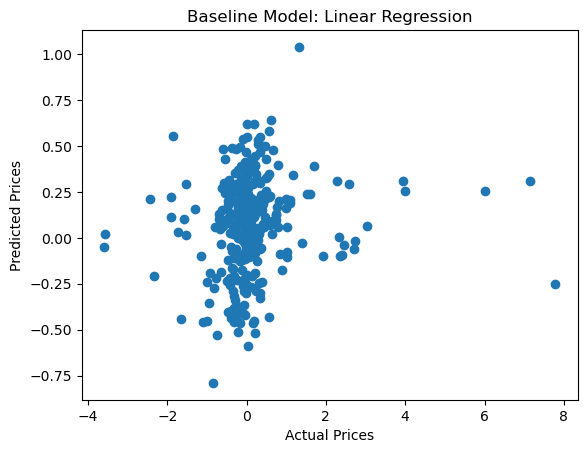

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Baseline Model: Linear Regression")
plt.show()

## Conclusion
In the first step of this work, we analyzed the data. This step was important to understand our dataset and how our data evolves with each other.
Then we prepared and preprocessed the dataset, handled missing values, encoded categorical variables, and implemented a baseline Linear Regression model.
It was also important to formalize the problem to understand the context.

Finally, the obtained metrics show that the model does not yet capture the relationships between the features and the target variable. In the next stages, we plan to test more advanced models and perform feature engineering in order to improve the predictive performance and achieve better evaluation metrics. Further more we will interset in another evaluation metric that we explain before, the Spearman correlation, which measures how well the predicted values preserve the rank order of the true target values.